In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)

$x = F^{-1}(\xi) \rightarrow x \sim f(x)$

$f(x) = \Sigma e^{-\Sigma x}$ for $x  \in [0, \infty]$

$F(x) = \int^{x}_0 f(x')dx' = 1-e^{-\Sigma x}$

(0, 2)

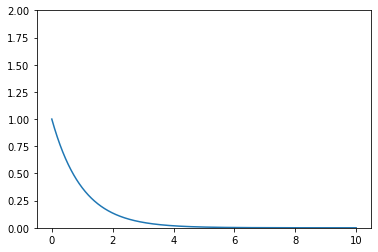

In [2]:
x = np.linspace(0, 10, 1000)
f = np.exp(-x)
F = 1 - np.exp(-x)
plt.plot(x, f)
plt.ylim(0, 2)

$$
\xi = F(x) =  1-e^{-\Sigma x}
$$

$$
x = \log(1-\xi)/(-\Sigma) = -\log(\xi)/\Sigma
$$

In [3]:
n = 1000
xi = np.random.rand(1000)
z = -np.log(xi)

(array([497., 234., 120.,  62.,  44.,  20.,  12.,   9.,   0.,   2.]),
 array([3.62768794e-05, 6.47385911e-01, 1.29473554e+00, 1.94208518e+00,
        2.58943481e+00, 3.23678445e+00, 3.88413408e+00, 4.53148371e+00,
        5.17883335e+00, 5.82618298e+00, 6.47353261e+00]),
 <a list of 10 Patch objects>)

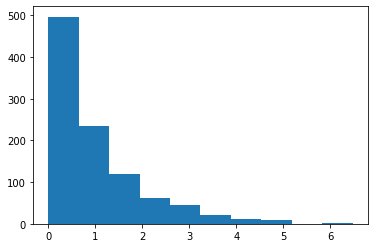

In [4]:
plt.hist(z)

For the discrete case,

$$
  f(x_i) = p_i \, \quad i \in [0, 1, \ldots n] \, .
$$

$$
1 = \sum_i p_i 
$$

Let $p_0 = p_1 = p_2 = 1/3$, so $F(0) = 1/3$, $F(1) = 2/3$, and $F(2) = 3/3$.

(0, 1)

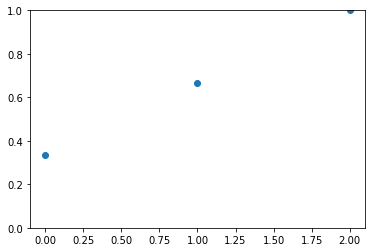

In [5]:
plt.plot([0, 1, 2], [1/3, 2/3, 3/3], 'o'); plt.ylim(0, 1)

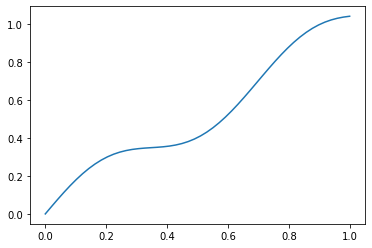

In [6]:
x = np.linspace(0, 1)
f = 0.1*np.sin(x*9)+x
plt.plot(x, f)

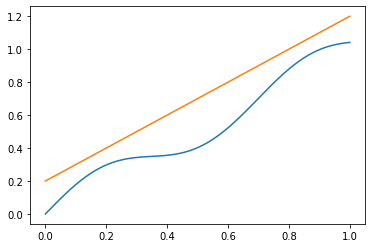

In [7]:
f = lambda x: 0.1*np.sin(x*9)+x
g = lambda x: (x + 0.2)*10/7  #  g = a(x + 1/5) --> G(x) = x^2/2 + x/5  = xi  -->  (0.5)x^2 + (0.2)x - (xi)
M = 0.7                 #   --> x = [(-0.2) +/- root(.2^2 + 4*.5*xi)]/[2*.5] = -1/5 + sqrt(.04+2*xi*7/10)
                       #  a(1/2 + 1/5) = 1 -- > a = 1/(7/10) = 10/7
xx = np.linspace(0, 1, 1000)
plt.plot(xx, f(xx), xx, M*g(xx))

In [8]:
x_samples = []
n = 100000
num_rej = 0
for i in range(n):
    xi = np.random.rand()
    x = -1/5 + np.sqrt(.04+2*xi*7/10)
    xi = np.random.rand()
    if xi < f(x)/(M*g(x)):
        x_samples.append(x)
    else:
        num_rej += 1
    # reject
print(num_rej/n)

0.25265


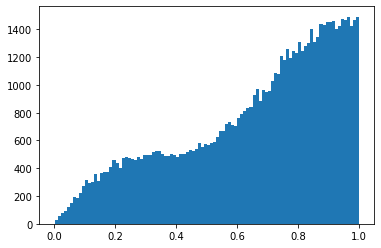

In [9]:
plt.hist(x_samples,100);

In [10]:
len(x_samples)

74735

Consider a point, isotropically-emitting source of neutrons at 1 MeV in a 1 m radius sphere of special purely absorbing stuff for which $\Sigma_a = 2$ cm$^{-1}$.

In [16]:
# I(r) = I_0*exp(-1)
P_esc_ref = np.exp(-1)

In [121]:
def fun_mc2(n = 100000):
    r = 2
    sig_a = 0.5
    #history = []
    S1, S2 = 0, 0
    xi = np.random.rand(n)
    d = -np.log(xi) / sig_a
    history = np.array(d > r, dtype='int')
    """ 
    for h in range(0, n):
        xi = np.random.rand();
        mfps = -np.log(xi)
        d = mfps/sig_a
        if (d > r):
            history.append(1)
            S1 += 1;  S2 += 1;
        else:
            history.append(0)
    """
    S1 = sum(history)
    S2 = sum(history)
    P_esc_mc = S1 / n
    #print(("{:.5e}  "*3).format(P_esc_ref, P_esc_mc, abs(P_esc_ref-P_esc_mc)))
    return S1, S2, history

(array([63339.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 36661.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

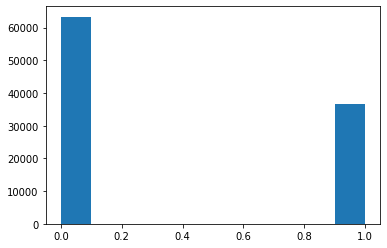

In [122]:
S1, S2, h = fun_mc2(100000)
plt.hist(h)

In [132]:
n = 10000000
step = 5000
num_step = n // step

S1s, S2s, hs = [], [], []
for i in range(num_step):
   S1, S2, h = fun_mc2(n = step)
   S1s.append(S1); S2s.append(S2); hs.append(h)
    
mu = np.mean(S1s)
var = np.var(S1s)

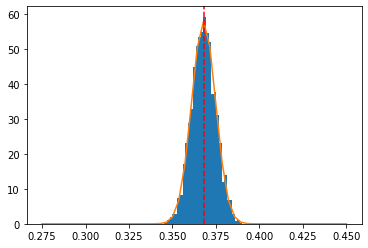

In [141]:
x = np.array(S1s, dtype='float')/step
mu = np.mean(x)
var = np.var(x, ddof=1)
plt.hist(x, 30, density=True)
import scipy.stats as ss
d = lambda x: (1/np.sqrt(2*np.pi*var))*np.exp(-(x-mu)**2/2/var)
z = np.linspace(0.275, 0.45)
plt.plot(z, d(z))
plt.axvline(P_esc_ref, ls='--', c='r')

(array([6321030.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 3678970.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

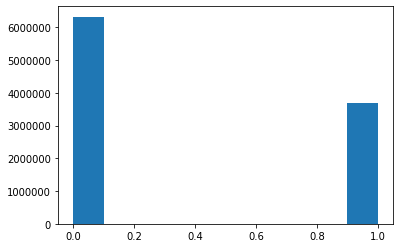

In [142]:
H = []
for h in hs:
    H += list(h)
plt.hist(H)

In [135]:
np.mean(H)

0.367897

In [136]:
mu

0.36789700000000003

In [146]:
var_H = np.var(H, ddof=1)
var_H

0.23254882064588198

In [147]:
var

4.7340941470735374e-05

In [149]:
var_H/var

4912.213686955002

In [140]:
help(np.var)

Help on function var in module numpy:

var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)
    Compute the variance along the specified axis.
    
    Returns the variance of the array elements, a measure of the spread of a
    distribution.  The variance is computed for the flattened array by
    default, otherwise over the specified axis.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose variance is desired.  If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the variance is computed.  The default is to
        compute the variance of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a variance is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the variance.  For arrays of integer t